# Project 02 - Image Processing

## Student Information

- Full name: Nguyễn Trần Thiên An
- Student ID: 23127315
- Class: 23CLC04

## Required Libraries

In [1]:
# IMPORT YOUR LIBS HERE
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

## Function Definitions

In [6]:
def read_img(img_path):
    '''
    Read image from img_path

    Parameters
    ----------
    img_path : str
        Path of image

    Returns
    -------
        Image
    '''

    # YOUR CODE HERE
    img = Image.open(img_path).convert('RGB')
    return np.array(img).astype(np.uint8)


def show_img(img):
    '''
    Show image

    Parameters
    ----------
    img : <your type>
        Image
    '''

    # YOUR CODE HERE
    # Determine if the image is grayscale (single channel) or RGB (3 channels)
    if len(img.shape) == 2 or (len(img.shape) == 3 and img.shape[2] == 1):
        cmap = 'gray'  # Use grayscale colormap for single-channel images
    else:
        cmap = None  # Use default RGB colormap for 3-channel images
    plt.figure(figsize=(7,7))
    plt.imshow(img, cmap=cmap)
    plt.axis('off')
    plt.show()


def save_img(img, img_path):
    '''
    Save image to img_path

    Parameters
    ----------
    img : <your type>
        Image
    img_path : str
        Path of image
    '''

    # YOUR CODE HERE
    Image.fromarray(img).save(img_path)


#--------------------------------------------------------------------------------
# YOUR FUNCTIONS HERE
def increase_brightness(img, alpha=50):
    """
    Adjust the brightness of the input image.

    Parameters
    ----------
    img : np.ndarray
        Input image array (height x width x 3) in RGB format.
    alpha : float or int, optional
        Brightness adjustment value in the range [-255, 255].
        Positive values increase brightness; negative values decrease it.

    Returns
    -------
    np.ndarray
        The image after brightness adjustment.
    """
    res = img.astype(np.int16) + alpha
    res = np.clip(res, 0, 255)
    return res.astype(np.uint8)

def contrast(img, alpha=1.8):
    """
    Adjust the contrast of the input image.

    Parameters
    ----------
    img : np.ndarray
        Input image array (height x width x 3) in RGB format.
    alpha : float, optional
        Contrast adjustment factor:
        - alpha < 1: decrease contrast
        - alpha = 1: no change
        - alpha > 1: increase contrast

    Returns
    -------
    np.ndarray
        The image after contrast adjustment.
    """
    # res = img.astype(np.int16) * alpha
    # res = np.clip(res, 0, 255)
    # return res.astype(np.uint8)
    res = img.astype(np.float32)
    mean = np.mean(res, axis=(0, 1), keepdims=True)  
    degenerate = np.full_like(res, mean)
    

    # Apply contrast adjustment formula
    res = degenerate + alpha * (res - degenerate)
    res = np.clip(res, 0, 255)
    return res.astype(np.uint8)

def flip_img(img):
    """
    Flip the input image horizontally and vertically.

    Parameters
    ----------
    img : np.ndarray
        Input image array (height x width x channels).

    Returns
    -------
    tuple of np.ndarray
        A tuple containing:
        - ver_flip_img : np.ndarray
            Image flipped vertically (left-right).
        - hor_flip_img : np.ndarray
            Image flipped horizontally (top-bottom).
    """
    m, n = img.shape[0], img.shape[1]

    # horizontal flip
    hor_flip_img = np.flip(img, axis=0)

    # vertical flip
    ver_flip_img = np.flip(img, axis=1)

    return ver_flip_img, hor_flip_img

def grayscale(img):
    """
    Convert the input image to grayscale.

    Parameters
    ----------
    img : np.ndarray
        Input image array (height x width x 3) in RGB format.

    Returns
    -------
    np.ndarray
        The grayscale image with shape (height x width).
    """
    m, n = img.shape[0], img.shape[1]
    res = img.astype(np.float32).reshape(-1, 3)
    luma_grayscale = np.array([0.299, 0.587, 0.114])
    res = res @ luma_grayscale.T
    res = res.reshape(m, n)
    return res.astype(np.uint8)

def sepiascale(img):
    """
    Apply a sepia filter to the input image.

    Parameters
    ----------
    img : np.ndarray
        Input image array (height x width x 3) in RGB format.

    Returns
    -------
    np.ndarray
        The new image after applying the sepia effect, with the same shape as the input.
    """
    h, w = img.shape[:2]
    sepia_filter = np.array([[0.393, 0.769, 0.189],
                             [0.349, 0.686, 0.168],
                             [0.272, 0.534, 0.131]], dtype=np.float32)
    res = img.astype(np.float32).reshape(-1, 3)
    res = res @ sepia_filter.T
    res = res.reshape(h, w, 3)
    return np.clip(res, 0, 255).astype(np.uint8)

def blur_img(img, kernel=(1/9) * np.ones((3,3))):
    """
    Apply a blur effect to the image using a given kernel.

    Parameters
    ----------
    img : np.ndarray
        Input image array (height x width x 3).
    kernel : np.ndarray, optional
        Convolution kernel used for blurring (default is a 3x3 averaging kernel).

    Returns
    -------
    np.ndarray
        The blurred image as an array of the same shape as the input.
    """
    m, n = img.shape[:2]
    k = kernel.shape[0]
    res = np.zeros_like(img)
    for color in range(3):
        color_pad = np.pad(img[:,:,color], pad_width=k//2, mode='constant')
        for i in range(m):
            for j in range(n):
                matrix = color_pad[i:i + k, j:j + k]
                res[i, j, color] = np.clip(np.sum(matrix * kernel), 0, 255)
    return res.astype(np.uint8)

def sharpen_img(img, kernel=np.array([[-1, -1, -1],
                                      [-1, 9, -1],
                                      [-1, -1, -1]])):
    """
    Apply a sharpening filter to the input image.

    Parameters
    ----------
    img : np.ndarray
        Input image array (height x width x 3) in RGB format.
    kernel : np.ndarray, optional
        Sharpening kernel to be applied. Default is a basic 3x3 sharpening kernel.

    Returns
    -------
    np.ndarray
        The sharpened image.
    """
    m, n = img.shape[:2]
    k = kernel.shape[0]
    res = np.zeros_like(img)
    for color in range(3):
        color_pad = np.pad(img[:,:,color], pad_width=k//2, mode='edge')
        for i in range(m):
            for j in range(n):
                matrix = color_pad[i:i+k, j:j+k]
                res[i, j, color] = np.clip(np.sum(matrix * kernel), 0, 255)
    return res.astype(np.uint8)
    

def crop_img_a_quarter(img, alpha=0.25):
    """
    Crop the center quarter of the input image.

    Parameters
    ----------
    img : np.ndarray
        Input image array (height x width x channels).
    alpha : float, optional
        Proportion of image to keep. Default is 0.25 (center quarter).

    Returns
    -------
    np.ndarray
        The cropped image containing the central region.
    """
    m, n = img.shape[:2]
    input_size=(m // 2, n // 2)
    center = ((m - 1) / 2, (n - 1) / 2)
    res = np.zeros(input_size)
    indices = (int(center[0] - input_size[0] // 2), int(center[1] - input_size[1] // 2))
    res = img[indices[0] : indices[0] + input_size[0], indices[1] : indices[1] + input_size[1]]
    return res

def crop_img_circle(img):
    """
    Crop the image to a circular region centered in the image.
    All pixels outside the circle are set to black (0).

    Parameters
    ----------
    img : np.ndarray
        Input image array (height x width x channels).

    Returns
    -------
    np.ndarray
        The circularly cropped image with background masked out.
    """
    # m: height -> y , n: width -> x
    m, n = img.shape[:2]
    square_radius = (min(m, n) / 2) ** 2
    center = ((n - 1) / 2, (m - 1) / 2)
    Xv, Yv = np.meshgrid(np.arange(0, n, 1), np.arange(0, m, 1))
    f = (Xv - center[0])**2 + (Yv-center[1])**2
    res = img.copy()
    mask = f > square_radius
    res[mask] = 0
    return res

def find_formula_ellipses(Xv, Yv, alpha=0.5,A=1, B=1):
    """
    Compute the formulas of two rotated ellipses used for masking.

    Parameters
    ----------
    Xv : np.ndarray
        Normalized X-coordinates grid.
    Yv : np.ndarray
        Normalized Y-coordinates grid.
    alpha : float, optional
        Rotation factor in the range [0, 1], mapped to [pi/2, pi].
    A : float, optional
        Normalization factor for the x-axis.
    B : float, optional
        Normalization factor for the y-axis.

    Returns
    -------
    tuple of np.ndarray
        Two evaluated ellipse formula results (f_1, f_2) used for masking.
    """
    theta_norm = alpha * (np.pi / 2) + (np.pi / 2)
    f_1 = (Xv/A)**2 + (Yv/B)**2 - 2*(Xv/A)*(Yv/B)*np.cos(theta_norm) - (np.sin(theta_norm))**2
    f_2 = (Xv/A)**2 + (Yv/B)**2 + 2*(Xv/A)*(Yv/B)*np.cos(theta_norm) - (np.sin(theta_norm))**2
    return f_1, f_2

def crop_img_ellipse(img, alpha=0.5):
    """
    Crop the image using the intersection of two rotated ellipses centered in the image.
    All pixels outside this elliptical region are set to black (0).

    Parameters
    ----------
    img : np.ndarray
        Input image array (height x width x channels).
    alpha : float, optional
        Rotation control parameter for the ellipse formulas, in range [0, 1].

    Returns
    -------
    np.ndarray
        The elliptically cropped image.
    """
    height, width = img.shape[:2]
    
    # Dynamic normalization
    if height >= width:
        A = 1
        B = height / width
    else:
        B = 1
        A = width / height

    # normalize y, which belongs to {0, 1,..., width - 1}, to the domain [-A, A]:
    X_normalize = np.linspace(-A, A, width)
    # normalize x, which belongs to {0, 1,..., height - 1}, to the domain [-B, B]:
    Y_normalize = np.linspace(-B, B, height)
    Xv, Yv = np.meshgrid(X_normalize, Y_normalize)
    f_1, f_2 = find_formula_ellipses(Xv, Yv, alpha,A,B)
    
    res = img.copy()
    mask = (f_1 > 0) & (f_2 > 0)
    res[mask] = 0

    return res


def process_image(img, choice, output_dir='.', ext='.png', base_name='output'):
    img_out_list = []
    suffixes = []

    if choice == 0:
        bright = increase_brightness(img)
        cont = contrast(img)
        ver, hor = flip_img(img)
        gray = grayscale(img)
        sepia = sepiascale(img)
        blur = blur_img(img)
        sharp = sharpen_img(img)
        crop_center = crop_img_a_quarter(img)
        circle_crop = crop_img_circle(img)
        ellipse_crop = crop_img_ellipse(img)

        img_out_list = [bright, cont, ver, hor, gray, sepia, blur, sharp, crop_center, circle_crop, ellipse_crop]
        suffixes = ['bright', 'contrast', 'flip_vertical', 'flip_horizontal', 'grayscale', 'sepia', 'blur', 'sharpen', 'crop_center', 'crop_circle', 'crop_ellipse']

    elif choice == 1:
        alpha = int(input("Enter brightness value (suggested [-255, 255]): "))
        img_out_list = [increase_brightness(img, alpha=alpha)]
        suffixes = ['bright']

    elif choice == 2:
        alpha = float(input("Enter contrast alpha (e.g., <1=less, 1=original, >1=more): "))
        img_out_list = [contrast(img, alpha=alpha)]
        suffixes = ['contrast']

    elif choice == 3:
        ver, hor = flip_img(img)
        img_out_list = [ver, hor]
        suffixes = ['flip_vertical', 'flip_horizontal']

    elif choice == 4:
        img_out_list = [grayscale(img), sepiascale(img)]
        suffixes = ['grayscale', 'sepia']

    elif choice == 5:
        img_out_list = [blur_img(img), sharpen_img(img)]
        suffixes = ['blur', 'sharpen']

    elif choice == 6:
        img_out_list = [crop_img_a_quarter(img)]
        suffixes = ['crop_center']

    elif choice == 7:
        circle_crop = crop_img_circle(img)
        alpha = float(input("Enter ellipse alpha (suggested: 0 - 1.0): "))
        ellipse_crop = crop_img_ellipse(img, alpha=alpha)
        img_out_list = [circle_crop, ellipse_crop]
        suffixes = ['crop_circle', 'crop_ellipse']

    else:
        print("Invalid choice.")
        return None, None

    for i, im in enumerate(img_out_list):
        show_img(im)
        path = f"{output_dir.rstrip('/')}/{base_name}_{suffixes[i]}{ext}"
        save_img(im, path)
        print(f"Saved: {path}")

    return img_out_list, suffixes

<ins>Note:</ins> For clarity, include docstrings with each function.

## Your tests

## Main FUNCTION

In [7]:
def main():
    img_path = input("Enter image filename (e.g., cat.png): ").strip()

    try:
        with open(img_path, 'rb') as f:
            pass
    except:
        print("Image not found.")
        return

    base_name = img_path.rsplit('/', 1)[-1].rsplit('.', 1)[0]
    ext = '.' + img_path.rsplit('.', 1)[-1]

    output_dir = input("Enter output directory path (default: current directory): ").strip() or '.'
    img = read_img(img_path)

    print('''Choose processing function:
        1 - Adjust Brightness
        2 - Adjust Contrast
        3 - Flip Image (Vertical + Horizontal)
        4 - Convert to Grayscale and Sepia
        5 - Blur and Sharpen
        6 - Crop center (1/4)
        7 - Crop by Circle and Ellipse
        0 - Apply ALL functions
        ''')

    try:
        choice = int(input("Your choice: "))
    except ValueError:
        print("Invalid input.")
        return

    process_image(img, choice, output_dir, ext, base_name)


Choose processing function:
        1 - Adjust Brightness
        2 - Adjust Contrast
        3 - Flip Image (Vertical + Horizontal)
        4 - Convert to Grayscale and Sepia
        5 - Blur and Sharpen
        6 - Crop center (1/4)
        7 - Crop by Circle and Ellipse
        0 - Apply ALL functions
        


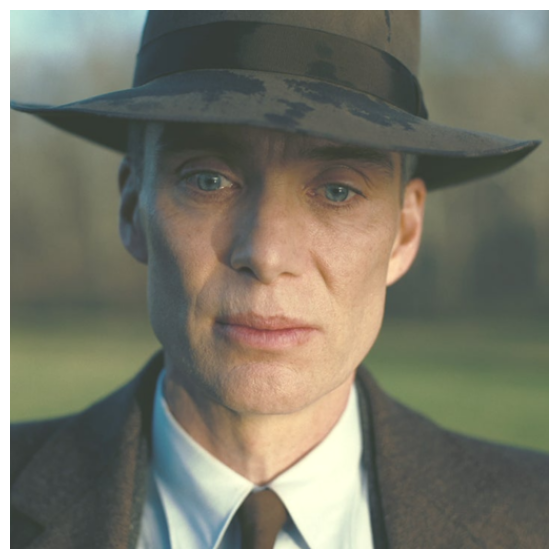

Saved: ./oppenheimer_bright.png


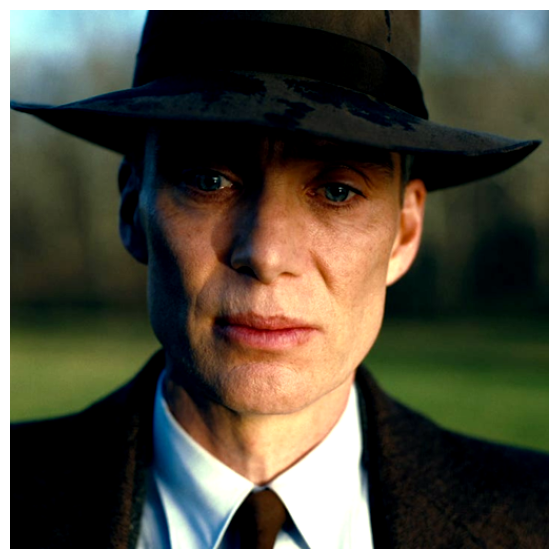

Saved: ./oppenheimer_contrast.png


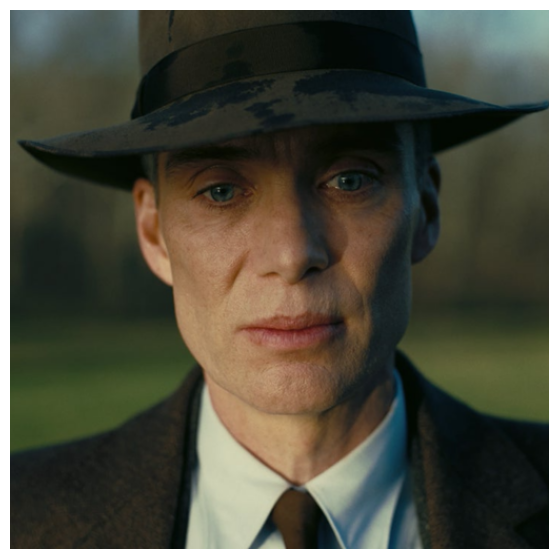

Saved: ./oppenheimer_flip_vertical.png


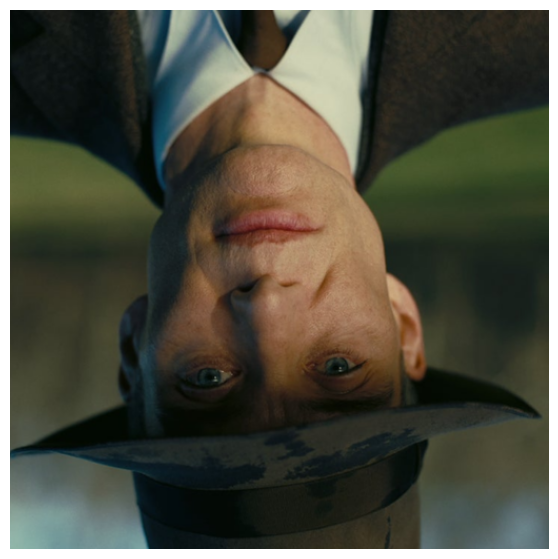

Saved: ./oppenheimer_flip_horizontal.png


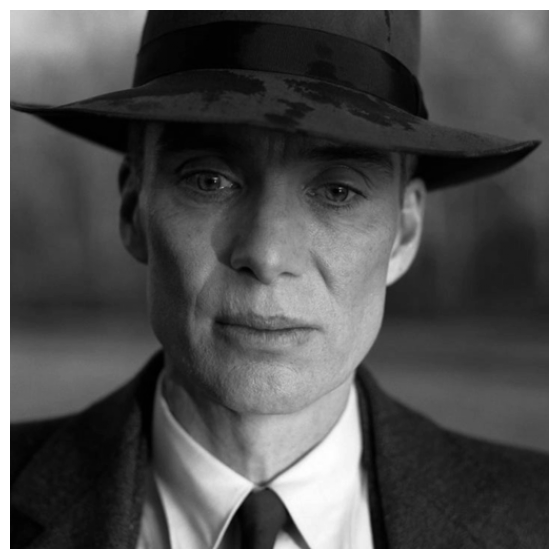

Saved: ./oppenheimer_grayscale.png


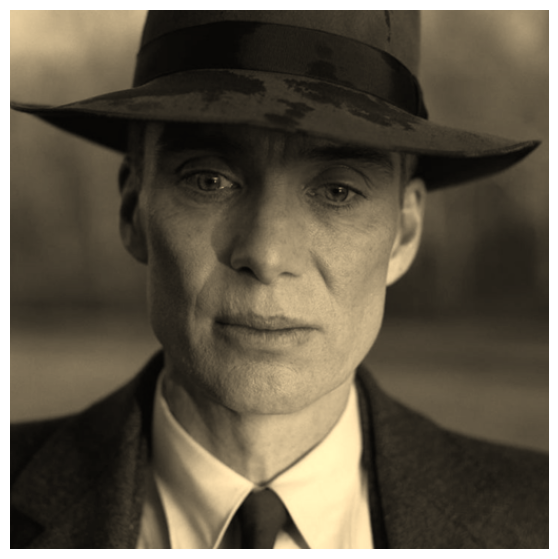

Saved: ./oppenheimer_sepia.png


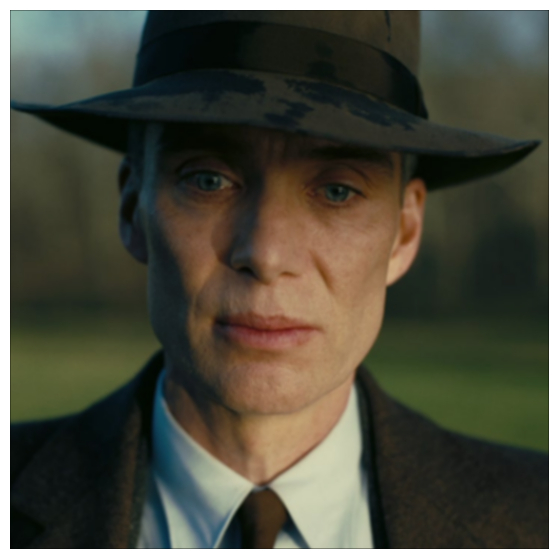

Saved: ./oppenheimer_blur.png


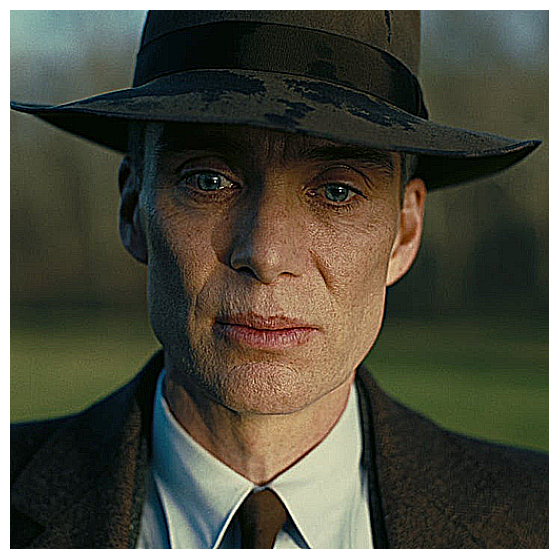

Saved: ./oppenheimer_sharpen.png


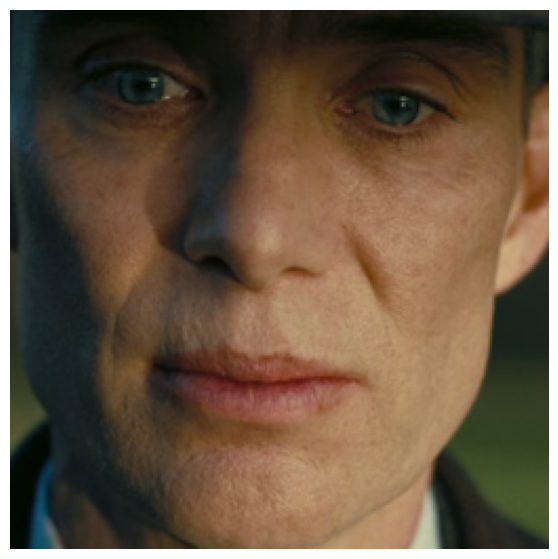

Saved: ./oppenheimer_crop_center.png


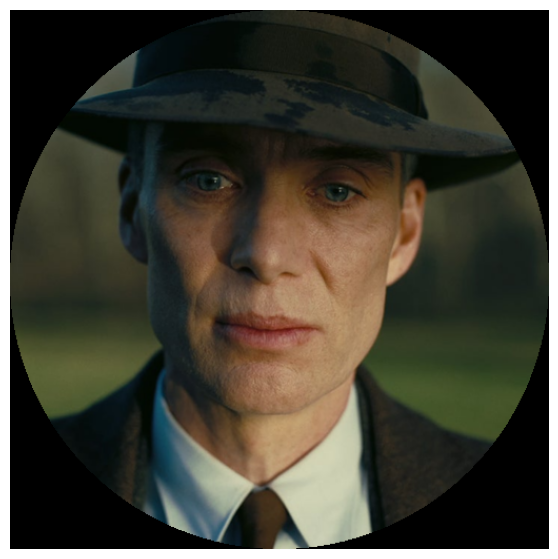

Saved: ./oppenheimer_crop_circle.png


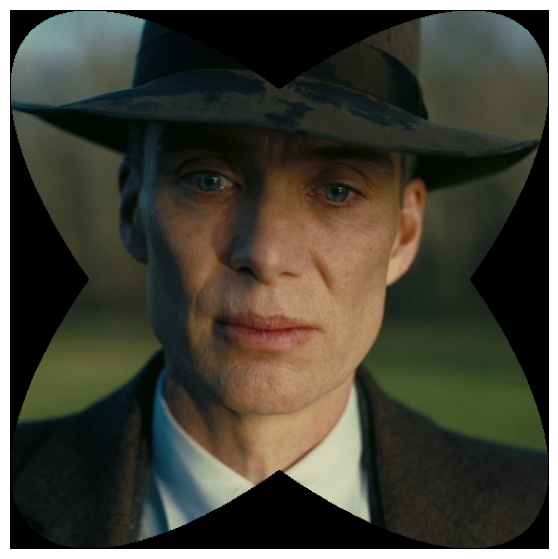

Saved: ./oppenheimer_crop_ellipse.png


In [16]:
# Call main function
main()